In [1]:
import pandas as pd
import numpy as np
import requests
import geopandas as gpd
import matplotlib.pyplot as plt


import folium
from folium.plugins import HeatMap
import branca


from shapely.geometry import Point

In [2]:
url = "https://developer.nrel.gov/api/alt-fuel-stations/v1.json"  # Replace with the actual API endpoint
params = {
    'format': 'json',  # Output response format
    'api_key': 'Tbqhfv28h6gIIxbaMTByUNg4ByP2vf1E1A3XYgGa',  # Your developer API key
    'status': 'all',  # Return stations that match the given status
    # 'access': 'public',  # Return stations with the given access type
    'fuel_type': 'ELEC', # Return stations that supply any of the given fuel types
    'state': 'CA',
    'country': 'US',
    
}

response = requests.get(url, params=params)
if response.status_code == 200:

    data = response.json()

In [28]:
df = pd.DataFrame(data['fuel_stations'])
sdf = df.copy()
sdf = sdf[sdf['city']=='San Diego']
sdf.head(1)

,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,maximum_vehicle_class,...,rd_blends_fr,rd_max_biodiesel_level,nps_unit_name,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,ev_network_ids,federal_agency
170,public,Dealership business hours,CALL,None,2024-02-12,None,ELEC,Public - Call ahead,39932,None,...,None,None,None,None,None,None,Public - Appeler à l'avance,None,NaN,NaN


In [24]:
sdf[sdf['street_address'].str.contains('Judicial', case=False, na=False)]
# 616

,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,maximum_vehicle_class,...,rd_blends_fr,rd_max_biodiesel_level,nps_unit_name,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,ev_network_ids,federal_agency
616,public,None,None,None,2024-10-28,None,ELEC,Public,71519,None,...,None,None,None,None,None,None,Public,None,"{'station': ['121'], 'posts': ['194_1', '237_1']}",NaN


/tmp/ipykernel_2147/1558821307.py:23: FutureWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in the v2.0.0 release. Use the `routing.route_to_gdf` function instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  route_length_meters = sum(ox.utils_graph.get_route_edge_attributes(G, route, 'length'))


The distance of the route is 5.24 miles.


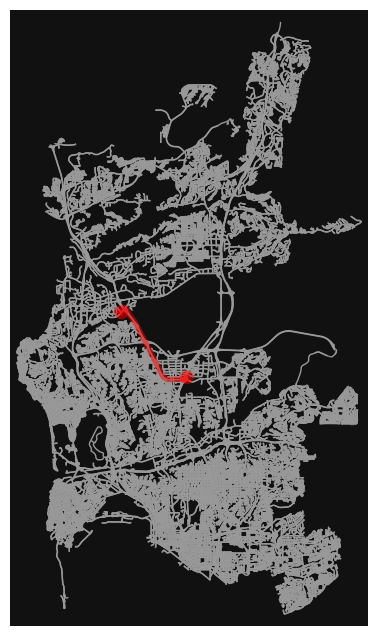

In [32]:
import osmnx as ox
import geopandas as gpd

# Approximate coordinates for "Kearny Villa Rd & Century Park Ct"
intersection_location = (32.823413, -117.144259)

# Load the San Diego road network
G = ox.graph_from_place("San Diego, California, USA", network_type="drive")

# Extract the coordinates for the observation point
observation_lat = sdf.loc[616]["latitude"]
observation_lon = sdf.loc[616]["longitude"]
observation_location = (observation_lat, observation_lon)

# Find the nearest network nodes to the intersection and the observation point
intersection_node = ox.nearest_nodes(G, X=intersection_location[1], Y=intersection_location[0])
observation_node = ox.nearest_nodes(G, X=observation_location[1], Y=observation_location[0])

# Calculate the shortest path by road
route = ox.shortest_path(G, intersection_node, observation_node, weight="length")

# Calculate the total length of the route in meters
route_length_meters = sum(ox.utils_graph.get_route_edge_attributes(G, route, 'length'))

# Convert the length to miles (1 mile = 1609.34 meters)
route_length_miles = route_length_meters / 1609.34

# Print the distance
print(f"The distance of the route is {route_length_miles:.2f} miles.")

# Plot the map with the shortest path highlighted
fig, ax = ox.plot_graph_route(G, route, route_linewidth=4, node_size=0)